In [62]:
git remote add origin https://github.com/williammt/Kaggle.git

SyntaxError: invalid syntax (<ipython-input-62-89c2a46bdc16>, line 1)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition

In [3]:
from sklearn import ensemble

In [4]:
from sklearn.decomposition import PCA, IncrementalPCA

In [5]:
from scipy.stats import skew
import pylab

In [6]:
train = pd.read_csv("application_train.csv")
test= pd.read_csv("application_test.csv")

In [7]:
bureau = pd.read_csv("bureau.csv")

In [8]:
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

# Imputation

In [9]:
ntrain = train.shape[0]
ntest = test.shape[0] 
y_train = train.TARGET.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['TARGET'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (356255, 121)


In [10]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
COMMONAREA_AVG,248360,0.697141
COMMONAREA_MODE,248360,0.697141
COMMONAREA_MEDI,248360,0.697141
NONLIVINGAPARTMENTS_MODE,246861,0.692933


In [11]:
all_data['WALLSMATERIAL_MODE'].value_counts().head(8)

Panel           77309
Stone, brick    75249
Block           10681
Wooden           6156
Mixed            2649
Monolithic       2068
Others           1909
Name: WALLSMATERIAL_MODE, dtype: int64

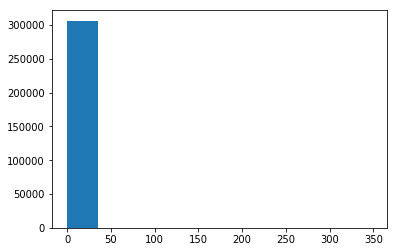

In [12]:
pylab.figure()
pylab.hist(train['OBS_30_CNT_SOCIAL_CIRCLE'][~np.isnan(train['OBS_30_CNT_SOCIAL_CIRCLE'])])
pylab.show()

In [13]:
train['TOTALAREA_MODE'].median()

0.0688

In [14]:
all_data[['WALLSMATERIAL_MODE','ELEVATORS_MODE']].sample(20)

,WALLSMATERIAL_MODE,ELEVATORS_MODE
159182,"Stone, brick",NaN
13762,NaN,NaN
271030,NaN,NaN
250700,Panel,0.3222
192076,"Stone, brick",0.0000
91873,Panel,0.0403
323633,Panel,0.1611
16407,NaN,NaN
33082,NaN,NaN
261903,"Stone, brick",0.0000


In [15]:
all_data[['WALLSMATERIAL_MODE','AMT_INCOME_TOTAL']].groupby(['WALLSMATERIAL_MODE'], as_index=False).median().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,WALLSMATERIAL_MODE,AMT_INCOME_TOTAL
2,Monolithic,202500.0
0,Block,157500.0
1,Mixed,157500.0
3,Others,157500.0
4,Panel,157500.0
5,"Stone, brick",157500.0
6,Wooden,144000.0


In [16]:
all_data[['OCCUPATION_TYPE','AMT_INCOME_TOTAL']].groupby(['OCCUPATION_TYPE'], as_index=False).median().sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,OCCUPATION_TYPE,AMT_INCOME_TOTAL
10,Managers,225000.0
0,Accountants,180000.0
13,Realty agents,180000.0
4,Drivers,180000.0
7,IT staff,180000.0
5,HR staff,162000.0
3,Core staff,157500.0
6,High skill tech staff,157500.0
8,Laborers,157500.0
12,Private service staff,157500.0


In [17]:
#revisit here
all_data["FONDKAPREMONT_MODE"] = all_data["FONDKAPREMONT_MODE"].fillna('reg oper account')
all_data["WALLSMATERIAL_MODE"] = all_data["WALLSMATERIAL_MODE"].fillna('Panel')

In [18]:
m1 = (all_data['AMT_INCOME_TOTAL'] <= 135000)
m2 = (all_data['AMT_INCOME_TOTAL'] >= 157500)

all_data.loc[m1,'OCCUPATION_TYPE'] = all_data.loc[m1,'OCCUPATION_TYPE'].fillna('Sales staff')
all_data.loc[m2,'OCCUPATION_TYPE'] = all_data.loc[m2,'OCCUPATION_TYPE'].fillna('Core staff')
all_data["OCCUPATION_TYPE"] = all_data["OCCUPATION_TYPE"].fillna('Laborers')

In [19]:
all_data["COMMONAREA_MEDI"] = all_data["COMMONAREA_MEDI"].fillna(0)
all_data["COMMONAREA_AVG"] = all_data["COMMONAREA_AVG"].fillna(0)
all_data["COMMONAREA_MODE"] = all_data["COMMONAREA_MODE"].fillna(0)

In [20]:
all_data["NONLIVINGAPARTMENTS_AVG"] = all_data["NONLIVINGAPARTMENTS_AVG"].fillna(0)
all_data["NONLIVINGAPARTMENTS_MODE"] = all_data["NONLIVINGAPARTMENTS_MODE"].fillna(0)
all_data["NONLIVINGAPARTMENTS_MEDI"] = all_data["NONLIVINGAPARTMENTS_MEDI"].fillna(0)

In [21]:
all_data["OWN_CAR_AGE"] = all_data["OWN_CAR_AGE"].fillna(all_data['OWN_CAR_AGE'].median())

In [22]:
all_data["ENTRANCES_MODE"] = all_data["ENTRANCES_MODE"].fillna(all_data['ENTRANCES_MODE'].median())
all_data["ENTRANCES_MEDI"] = all_data["ENTRANCES_MEDI"].fillna(all_data['ENTRANCES_MEDI'].median())
all_data["ENTRANCES_AVG"] = all_data["ENTRANCES_AVG"].fillna(all_data['ENTRANCES_AVG'].median())

In [23]:
all_data["LIVINGAPARTMENTS_AVG"] = all_data["LIVINGAPARTMENTS_AVG"].fillna(all_data['LIVINGAPARTMENTS_AVG'].median())
all_data["LIVINGAPARTMENTS_MODE"] = all_data["LIVINGAPARTMENTS_MODE"].fillna(all_data['LIVINGAPARTMENTS_MODE'].median())
all_data["LIVINGAPARTMENTS_MEDI"] = all_data["LIVINGAPARTMENTS_MEDI"].fillna(all_data['LIVINGAPARTMENTS_MEDI'].median())

In [24]:
all_data["AMT_REQ_CREDIT_BUREAU_HOUR"] = all_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0)

In [25]:
all_data["EXT_SOURCE_3"] = all_data["EXT_SOURCE_3"].fillna(all_data['EXT_SOURCE_3'].median())

In [26]:
all_data["ELEVATORS_MODE"] = all_data["ELEVATORS_MODE"].fillna(0)
all_data["ELEVATORS_MEDI"] = all_data["ELEVATORS_MEDI"].fillna(0)
all_data["ELEVATORS_AVG"] = all_data["ELEVATORS_AVG"].fillna(0)

In [27]:
all_data["FLOORSMIN_AVG"] = all_data["FLOORSMIN_AVG"].fillna(all_data['FLOORSMIN_AVG'].median())
all_data["FLOORSMIN_MEDI"] = all_data["FLOORSMIN_MEDI"].fillna(all_data['FLOORSMIN_MEDI'].median())
all_data["FLOORSMIN_MODE"] = all_data["FLOORSMIN_MODE"].fillna(all_data['FLOORSMIN_MODE'].median())

In [28]:
all_data["YEARS_BUILD_MEDI"] = all_data["YEARS_BUILD_MEDI"].fillna(all_data['YEARS_BUILD_MEDI'].median())
all_data["YEARS_BUILD_MODE"] = all_data["YEARS_BUILD_MODE"].fillna(all_data['YEARS_BUILD_MODE'].median())
all_data["YEARS_BUILD_AVG"] = all_data["YEARS_BUILD_AVG"].fillna(all_data['YEARS_BUILD_AVG'].median())

In [29]:
all_data["FLOORSMAX_AVG"] = all_data["FLOORSMAX_AVG"].fillna(all_data['FLOORSMAX_AVG'].median())
all_data["FLOORSMAX_MEDI"] = all_data["FLOORSMAX_MEDI"].fillna(all_data['FLOORSMAX_MEDI'].median())
all_data["FLOORSMAX_MODE"] = all_data["FLOORSMAX_MODE"].fillna(all_data['FLOORSMAX_MODE'].median())

In [30]:
all_data["APARTMENTS_AVG"] = all_data["APARTMENTS_AVG"].fillna(all_data['APARTMENTS_AVG'].median())
all_data["APARTMENTS_MEDI"] = all_data["APARTMENTS_MEDI"].fillna(all_data['APARTMENTS_MEDI'].median())
all_data["APARTMENTS_MODE"] = all_data["APARTMENTS_MODE"].fillna(all_data['APARTMENTS_MODE'].median())

In [31]:
all_data["LIVINGAREA_AVG"] = all_data["LIVINGAREA_AVG"].fillna(all_data['LIVINGAREA_AVG'].median())
all_data["LIVINGAREA_MEDI"] = all_data["LIVINGAREA_MEDI"].fillna(all_data['LIVINGAREA_MEDI'].median())
all_data["LIVINGAREA_MODE"] = all_data["LIVINGAREA_MODE"].fillna(all_data['LIVINGAREA_MODE'].median())

In [32]:
all_data["LANDAREA_AVG"] = all_data["LANDAREA_AVG"].fillna(0)
all_data["LANDAREA_MEDI"] = all_data["LANDAREA_MEDI"].fillna(0)
all_data["LANDAREA_MODE"] = all_data["LANDAREA_MODE"].fillna(0)

In [33]:
all_data["BASEMENTAREA_AVG"] = all_data["BASEMENTAREA_AVG"].fillna(0)
all_data["BASEMENTAREA_MEDI"] = all_data["BASEMENTAREA_MEDI"].fillna(0)
all_data["BASEMENTAREA_MODE"] = all_data["BASEMENTAREA_MODE"].fillna(0)

In [34]:
all_data["NONLIVINGAREA_AVG"] = all_data["NONLIVINGAREA_AVG"].fillna(0)
all_data["NONLIVINGAREA_MEDI"] = all_data["NONLIVINGAREA_MEDI"].fillna(0)
all_data["NONLIVINGAREA_MODE"] = all_data["NONLIVINGAREA_MODE"].fillna(0)

In [35]:
all_data["YEARS_BEGINEXPLUATATION_AVG"] = all_data["YEARS_BEGINEXPLUATATION_AVG"].fillna(all_data['YEARS_BEGINEXPLUATATION_AVG'].median())
all_data["YEARS_BEGINEXPLUATATION_MEDI"] = all_data["YEARS_BEGINEXPLUATATION_MEDI"].fillna(all_data['YEARS_BEGINEXPLUATATION_MEDI'].median())
all_data["YEARS_BEGINEXPLUATATION_MODE"] = all_data["YEARS_BEGINEXPLUATATION_MODE"].fillna(all_data['YEARS_BEGINEXPLUATATION_MODE'].median())

In [36]:
all_data["HOUSETYPE_MODE"] = all_data["HOUSETYPE_MODE"].fillna('block of flats')

In [37]:
all_data["TOTALAREA_MODE"] = all_data["TOTALAREA_MODE"].fillna(all_data['TOTALAREA_MODE'].median())

In [38]:
all_data["EXT_SOURCE_1"] = all_data["EXT_SOURCE_1"].fillna(all_data['EXT_SOURCE_1'].median())

In [39]:
all_data["EMERGENCYSTATE_MODE"] = all_data["EMERGENCYSTATE_MODE"].fillna('No')

In [40]:
all_data["AMT_ANNUITY"] = all_data["AMT_ANNUITY"].fillna(all_data['AMT_ANNUITY'].median())

In [41]:
all_data["DAYS_LAST_PHONE_CHANGE"] = all_data["DAYS_LAST_PHONE_CHANGE"].fillna(0)

In [42]:
all_data["CNT_FAM_MEMBERS"] = all_data["CNT_FAM_MEMBERS"].fillna(2)

In [43]:
all_data["AMT_GOODS_PRICE"] = all_data["AMT_GOODS_PRICE"].fillna(all_data['AMT_GOODS_PRICE'].median())

In [44]:
all_data["EXT_SOURCE_2"] = all_data["EXT_SOURCE_2"].fillna(all_data['EXT_SOURCE_2'].median())

In [45]:
all_data["DEF_30_CNT_SOCIAL_CIRCLE"] = all_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(0)
all_data["OBS_30_CNT_SOCIAL_CIRCLE"] = all_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0)
all_data["OBS_60_CNT_SOCIAL_CIRCLE"] = all_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0)
all_data["DEF_60_CNT_SOCIAL_CIRCLE"] = all_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(0)

In [46]:
all_data["NAME_TYPE_SUITE"] = all_data["NAME_TYPE_SUITE"].fillna('Unaccompanied')

In [47]:
all_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = all_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(all_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
all_data["AMT_REQ_CREDIT_BUREAU_QRT"] = all_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0)
all_data["AMT_REQ_CREDIT_BUREAU_DAY"] = all_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0)
all_data["AMT_REQ_CREDIT_BUREAU_MON"] = all_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)
all_data["AMT_REQ_CREDIT_BUREAU_WEEK"] = all_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0)

In [48]:
# categorical

In [49]:
length_YEARS_BUILD_AVG = all_data['YEARS_BUILD_AVG'].isnull().sum()

In [50]:
normal = np.random.normal(0.5,0.12,length_YEARS_BUILD_AVG)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

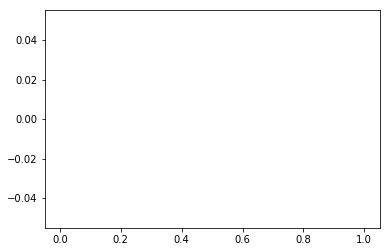

In [51]:
pylab.hist(normal)

# Transforming

In [52]:
train_ID = train['SK_ID_CURR']
test_ID = test['SK_ID_CURR']
test.drop("SK_ID_CURR", axis = 1, inplace = True)
all_data.drop("SK_ID_CURR", axis = 1, inplace = True)


In [53]:
all_data.select_dtypes(include=['object'])

,CODE_GENDER,EMERGENCYSTATE_MODE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,M,No,N,Y,reg oper account,block of flats,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,"Stone, brick",WEDNESDAY
1,F,No,N,N,reg oper account,block of flats,Cash loans,Higher education,Married,House / apartment,State servant,Family,Core staff,School,Block,MONDAY
2,M,No,Y,Y,reg oper account,block of flats,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government,Panel,MONDAY
3,F,No,N,Y,reg oper account,block of flats,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,Panel,WEDNESDAY
4,M,No,N,Y,reg oper account,block of flats,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Core staff,Religion,Panel,THURSDAY
5,M,No,N,Y,reg oper account,block of flats,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,"Spouse, partner",Laborers,Other,Panel,WEDNESDAY
6,F,No,Y,Y,reg oper account,block of flats,Cash loans,Higher education,Married,House / apartment,Commercial associate,Unaccompanied,Accountants,Business Entity Type 3,Panel,SUNDAY
7,M,No,Y,Y,reg oper account,block of flats,Cash loans,Higher education,Married,House / apartment,State servant,Unaccompanied,Managers,Other,Panel,MONDAY
8,F,No,N,Y,reg oper account,block of flats,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,Children,Sales staff,XNA,Panel,WEDNESDAY
9,M,No,N,Y,reg oper account,block of flats,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Electricity,Panel,THURSDAY


In [54]:
from sklearn.preprocessing import LabelEncoder
cols = ('CODE_GENDER','EMERGENCYSTATE_MODE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
        'FONDKAPREMONT_MODE','HOUSETYPE_MODE','NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','NAME_TYPE_SUITE',
        'OCCUPATION_TYPE','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','WEEKDAY_APPR_PROCESS_START')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (356255, 120)


In [55]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
FLAG_DOCUMENT_12,422.047983
AMT_INCOME_TOTAL,403.647965
FLAG_DOCUMENT_10,225.589387
FLAG_DOCUMENT_2,165.533171
AMT_REQ_CREDIT_BUREAU_QRT,124.313302
FLAG_DOCUMENT_4,108.959473
FLAG_DOCUMENT_7,76.401872
FLAG_DOCUMENT_17,65.890617
FLAG_DOCUMENT_21,58.785940
FLAG_DOCUMENT_20,47.756532


In [56]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
YEARS_BUILD_MODE,0,0.0
YEARS_BUILD_MEDI,0,0.0
ELEVATORS_MODE,0,0.0
EMERGENCYSTATE_MODE,0,0.0


In [57]:
all_data = pd.get_dummies(all_data)
train = all_data[:ntrain]
test = all_data[ntrain:]

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
train.to_csv('train_cleaned.csv',index=False)
test.to_csv('test_cleaned.csv',index=False)

# Modelling

# Sandbox Below

# TEST

# Dimensionality Reduction

# Modelling